Problem Statement:

Dataset is from a leading mobility service provider. Find out the variables significant in predicting the shared cycle demand and how they are related.

Concepts Used:

Bi-Variate Analysis

2-sample t-test: Testing for difference across populations

ANOVA

Chi-square

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('cycle.csv')
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Total of 10886 rows. There are no null values in any of the columns.

Eventhough only datetime is sshown as object Dtype from the date we understand categorical columns are datetime, season, holiday, workingday and weather. Rest all are continous variables.

Column count=casual + registered

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaN,NaN,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaN,NaN,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaN,NaN,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaN,NaN,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
temp,10886.0,NaN,NaN,NaN,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaN,NaN,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


In [ ]:
print("Season\n",df['season'].value_counts(),"\n")
print("Holiday\n",df['holiday'].value_counts(),"\n")
print("Working day\n",df['workingday'].value_counts(),"\n")
print("Weather\n",df['weather'].value_counts(),"\n")

Season
 4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64 

Holiday
 0    10575
1      311
Name: holiday, dtype: int64 

Working day
 1    7412
0    3474
Name: workingday, dtype: int64 

Weather
 1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64 



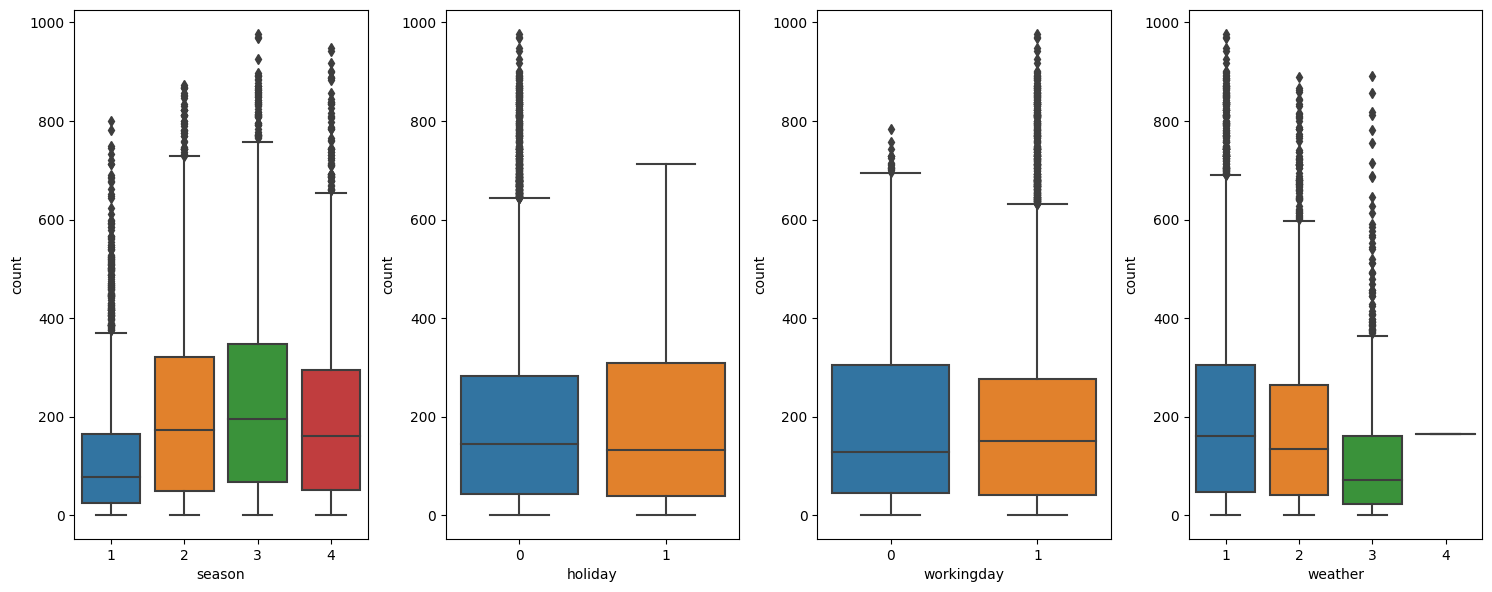

In [ ]:
categorical=['season','holiday','workingday','weather']
plt.figure(figsize=(15,6))
for i,j in enumerate(categorical):
  plt.subplot(1,4,i+1)
  plt.subplots_adjust(hspace=0.8)
  sns.boxplot(x=j,y='count',data=df)
  plt.tight_layout(pad=1)

In [ ]:
## Outlier treatment
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
iqr=q3-q1
df_new=df[(df['count']>=q1-1.5*iqr) & (df['count']<=q3+1.5*iqr)]

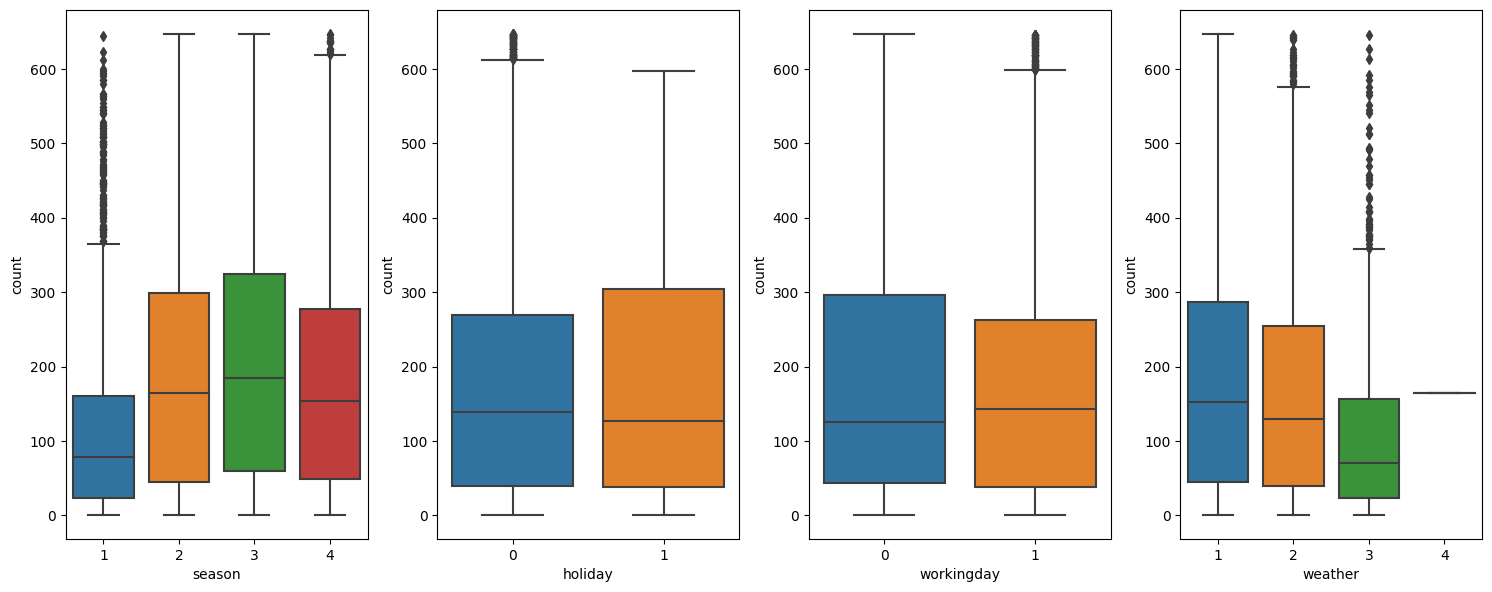

In [ ]:
plt.figure(figsize=(15,6))
for i,j in enumerate(categorical):
  plt.subplot(1,4,i+1)
  plt.subplots_adjust(hspace=0.8)
  sns.boxplot(x=j,y='count',data=df_new)
  plt.tight_layout(pad=1)

Inferences from the visual analysis:

Demand for cycles is very low during spring season.

Demand for cycles is almost same on holidays and weekends.

Demand is slightly higher on working days compared to holidays.

Demand is very less when there's rain or snowfall

## Working day Vs Demand

Ho= Count of cycles rented on working day is less than or equal to the count of cycles rented on a nonworking day

Ha= Count of cycles rented on working day is greater to the count of cycles rented on a non workingday

In [ ]:
df_new['workingday'].value_counts()

1    7161
0    3425
Name: workingday, dtype: int64

In [ ]:
working=df_new[df_new['workingday']==1]['count'].sample(3425)
nonworking=df_new[df_new['workingday']==0]['count'].sample(3425)

In [ ]:
df_new.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3425.0,181.373723,164.290054,1.0,43.0,125.0,296.0,647.0
1,7161.0,173.011591,152.358993,1.0,38.0,143.0,262.0,646.0


In [ ]:
from scipy.stats import ttest_ind
t_statistic,p_value=ttest_ind(working,nonworking,equal_var=False,alternative='greater')
print(t_statistic,p_value)

-2.3364354253613375 0.9902512873904794


Here p_value>0.05. So we failed to reject null hypothesis. That means working day doesn't create much impact on count of cycles rented.

Weather vs Count of cycles

Ho=same count of bicycles rented irrespective of weather

HA=count of bicycles rented varies with weather

Anova test can be performed

In [ ]:
df_new['weather'].value_counts()

1    6965
2    2770
3     850
4       1
Name: weather, dtype: int64

In [ ]:
df_new.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6965.0,187.329218,161.581066,1.0,45.0,153.0,287.0,647.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


weather 4 has only one entry so that we can discard it.
We can see significant change in number of cycles rented in weather 1.

In [ ]:
w1=df_new[df_new['weather']==1]['count'].sample(850)
w2=df_new[df_new['weather']==2]['count'].sample(850)
w3=df_new[df_new['weather']==3]['count'].sample(850)

Assumption testing

1.normality - qq plot, displot, shapiro wilk test

2.equal variance - levene test, group by describe

<ipython-input-26-38e6194f9732>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w1,color='green',hist=False)
<ipython-input-26-38e6194f9732>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w2,color='red',hist=False)
<ipython-input-26-38e6194f9732>:3: UserWarning: 

`distplot`

<Axes: xlabel='count', ylabel='Density'>

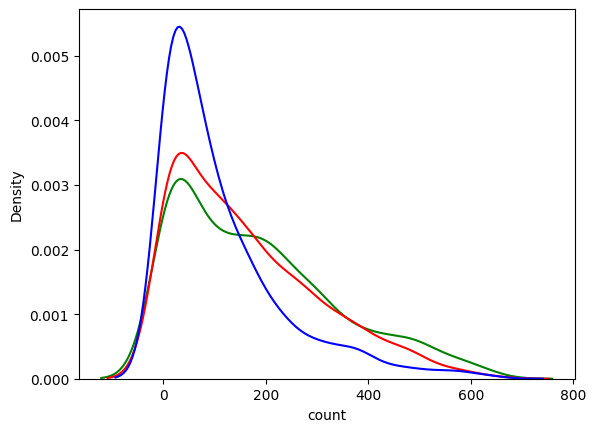

In [ ]:
sns.distplot(w1,color='green',hist=False)
sns.distplot(w2,color='red',hist=False)
sns.distplot(w3,color='blue',hist=False)

Doesn't look too normal. We will continue with Shapiro test may be after doing log transformation on data.

In [ ]:
from scipy.stats import shapiro
statistics,p_value=shapiro(w1)
print("w1=",statistics,p_value)
statistics,p_value=shapiro(w2)
print("w2=",statistics,p_value)
statistics,p_value=shapiro(w3)
print("w3=",statistics,p_value)

w1= 0.9139229655265808 1.5176574110039675e-21
w2= 0.90843266248703 3.502572459004563e-22
w3= 0.8118053674697876 2.4638935234478347e-30


Results says not normal. However proceeding with equal variance test.

In [ ]:
from scipy.stats import levene
statistics,p_value=levene(w1,w2,w3)
print(statistics,p_value)

41.8198626736297 1.348035940034838e-18


p_value < 0. That means we need to reject null hypothesis that variances are equal. Variance of atleast one group differs. Both assumptions fail as per test. However we are proceeding with Anova.

In [ ]:
from scipy.stats import f_oneway
t_stats,p_value=f_oneway(w1,w2,w3)
print(t_stats,p_value)

58.07563416721074 2.1690280864842066e-25


We reject null hypothesis. That means count of cycles rented varies with weather.

Season Vs Count of cycles

Ho=same count of bicycles rented irrespective of season

HA=count of bicycles rented varies with season

Anova test can be performed

In [ ]:
df_new['season'].value_counts()

1    2670
4    2665
2    2634
3    2617
Name: season, dtype: int64

In [ ]:
df_new.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.0,78.0,161.0,644.0
2,2634.0,195.824981,166.371838,1.0,45.0,165.0,299.0,647.0
3,2617.0,210.651127,164.245975,1.0,60.0,185.0,324.0,647.0
4,2665.0,184.578236,154.793646,1.0,49.0,154.0,277.0,647.0


In [ ]:
s1=df_new[df_new['season']==1]['count'].sample(2617)
s2=df_new[df_new['season']==2]['count'].sample(2617)
s3=df_new[df_new['season']==3]['count'].sample(2617)
s4=df_new[df_new['season']==4]['count'].sample(2617)

Normality assumption check

<ipython-input-36-e182aab48389>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s1,color='red',hist=False)
<ipython-input-36-e182aab48389>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s2,color='green',hist=False)
<ipython-input-36-e182aab48389>:3: UserWarning: 

`distplot`

<Axes: xlabel='count', ylabel='Density'>

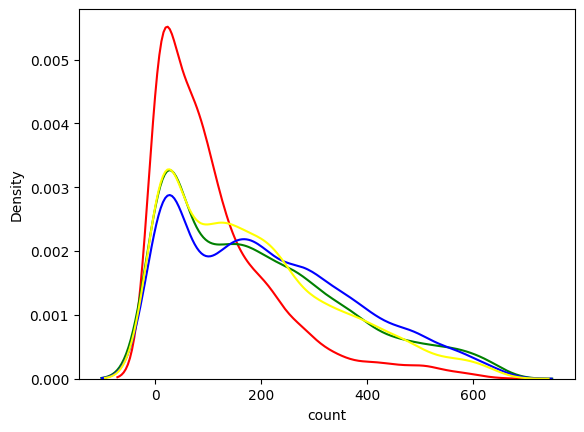

In [ ]:
sns.distplot(s1,color='red',hist=False)
sns.distplot(s2,color='green',hist=False)
sns.distplot(s3,color='blue',hist=False)
sns.distplot(s4,color='yellow',hist=False)

In [ ]:
stat,p_value=shapiro(s1)
print("season1=",stat,p_value)
stat,p_value=shapiro(s2)
print("season2=",stat,p_value)
stat,p_value=shapiro(s3)
print("season3=",stat,p_value)
stat,p_value=shapiro(s4)
print("season4=",stat,p_value)

season1= 0.8316338658332825 0.0
season2= 0.915474534034729 6.085584620236907e-36
season3= 0.9371488690376282 6.364172259631547e-32
season4= 0.9186981320381165 2.1186286816600669e-35


In [ ]:
## Repeating Shapiro after log transformation
stat,p_value=shapiro(np.log(s1))
print("season1=",stat,p_value)
stat,p_value=shapiro(np.log(s2))
print("season2=",stat,p_value)
stat,p_value=shapiro(np.log(s3))
print("season3=",stat,p_value)
stat,p_value=shapiro(np.log(s4))
print("season4=",stat,p_value)

season1= 0.9219277501106262 7.695124089902926e-35
season2= 0.8951181173324585 5.0081734491706086e-39
season3= 0.8763229846954346 1.7945028134143607e-41
season4= 0.8936526775360107 3.1389744211154135e-39


As per test, normality assumption is not met. Continuing with equal variance test.

In [ ]:
stat,p_value=levene(s1,s2,s3,s4)
print(stat,p_value)

172.1249466334803 6.285625313527519e-109


Results from the test and output from describe() says same variance cant be assumed. However we will continue with ANOVA

In [ ]:
stat,p_value=f_oneway(s1,s2,s3,s4)
print(stat,p_value)

211.1485792341876 5.525629470508387e-133


Negative p value says we reject null hypothesis. THat means count of cycles rented varies according to seasons. However we need to double check if its the season or weather that;s causing the difference. For that we will do a test on weather Vs Season

Weather Vs Season

H0: Weather is dependent on season

H1: Weather is independent of season

2 categorical vars. So chi-square test

In [ ]:
contigency=pd.crosstab(df_new['season'],df_new['weather'])
contigency

weather,1,2,3,4
season,,,,
1,1744,714,211,1
2,1721,690,223,0
3,1843,579,195,0
4,1657,787,221,0


<Axes: xlabel='season'>

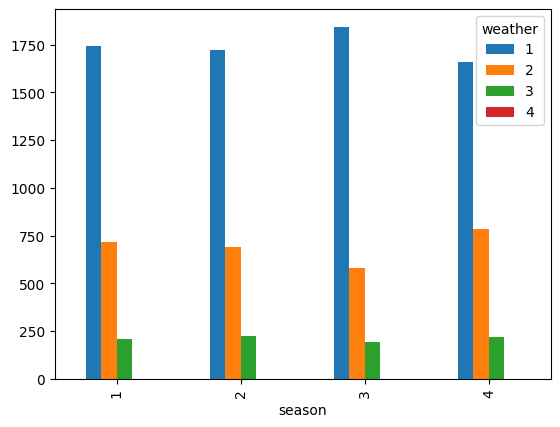

In [ ]:
contigency.plot(kind='bar')

In [ ]:
# Using the chi2 contigency test
from scipy.stats import chi2_contingency
chi2,pval,dof,exp_freq=chi2_contingency(contigency,correction=False)
print("Chi-Square statistic={},\n P value={},\n Degrees of freedom={},\n Expected frequency=\n{}".format(chi2,pval,dof,exp_freq))

Chi-Square statistic=47.17309400137371,
 P value=3.643774770920206e-07,
 Degrees of freedom=9,
 Expected frequency=
[[1.75671169e+03 1.73302569e+03 1.72184064e+03 1.75342197e+03]
 [6.98649159e+02 6.89229171e+02 6.84780843e+02 6.97340828e+02]
 [2.14386926e+02 2.11496316e+02 2.10131305e+02 2.13985452e+02]
 [2.52219913e-01 2.48819195e-01 2.47213301e-01 2.51747591e-01]]


From the diagram and as per test results, we got to reject null hypothesis. That's weather is independent of season. From the bar chart we see that irrespective of season all weather are in same ratios.

# Recommendations

Weather plays an important role in the number of cycles being rented irrespective of season, holiday or working day. People tend to rent cycle more on days which has clear sky, partly cloudy or misty.